# Homework 2 - Berkeley STAT 157

Handout 1/29/2019, due 2/5/2019 by 4pm in Git by committing to your repository.

In [49]:
from mxnet import nd, autograd, gluon 
from matplotlib import pyplot as py
import numpy as np
import re

# 1. Multinomial Sampling

Implement a sampler from a discrete distribution from scratch, mimicking the function `mxnet.ndarray.random.multinomial`. Its arguments should be a vector of probabilities $p$. You can assume that the probabilities are normalized, i.e. tha they sum up to $1$. Make the call signature as follows:

```
samples = sampler(probs, shape) 

probs   : An ndarray vector of size n of nonnegative numbers summing up to 1
shape   : A list of dimensions for the output
samples : Samples from probs with shape matching shape
```

Hints:

1. Use `mxnet.ndarray.random.uniform` to get a sample from $U[0,1]$.
1. You can simplify things for `probs` by computing the cumulative sum over `probs`.

In [187]:
def sampler(probs, shape):
    ## Add your codes here
    #mxnet.ndarray.random.uniform()
    flatten =  nd.zeros(shape).reshape(-1)
    cum = np.cumsum(probs)
    for i in range(len(flatten)):
        random = nd.random.uniform(0,1)
        index = 0
        while random > cum[index]:
            index += 1
        flatten[i] = probs[index]
    return flatten.reshape(shape)

# a simple test
sampler(nd.array([0.2, 0.3, 0.5]), (2,3))


[[0.2 0.3 0.2]
 [0.3 0.5 0.5]]
<NDArray 2x3 @cpu(0)>

# 2. Central Limit Theorem

Let's explore the Central Limit Theorem when applied to text processing. 

* Download [https://www.gutenberg.org/ebooks/84](https://www.gutenberg.org/files/84/84-0.txt) from Project Gutenberg 
* Remove punctuation, uppercase / lowercase, and split the text up into individual tokens (words).
* For the words `a`, `and`, `the`, `i`, `is` compute their respective counts as the book progresses, i.e. 
    $$n_\mathrm{the}[i] = \sum_{j = 1}^i \{w_j = \mathrm{the}\}$$
* Plot the proportions $n_\mathrm{word}[i] / i$ over the document in one plot.
* Find an envelope of the shape $O(1/\sqrt{i})$ for each of these five words. (Hint, check the last page of the [sampling notebook](http://courses.d2l.ai/berkeley-stat-157/slides/1_24/sampling.pdf))
* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
* Why does it still work quite well?

In [219]:
filename = gluon.utils.download('https://www.gutenberg.org/files/84/84-0.txt')
with open(filename) as f:
    book = f.read()
print(book[0:100])

## Add your codes here

def remove_and_split(boook):
    book =  re.sub(r'[^\w\s]','', boook )
    all_lower = [word.lower() for word in book.split()]
    return all_lower

def count_words(split_words):
    time_stamp = {'a': [] , 'and': [], 'the': [], 'i':[], 'is': []}
    for i in range(len(split_words)):
        word = split_words[i]
        if word in time_stamp.keys():
            time_stamp[word] =  np.append(time_stamp[word], i)
    return time_stamp
    



﻿
Project Gutenberg's Frankenstein, by Mary Wollstonecraft (Godwin) Shelley

This eBook is for the u


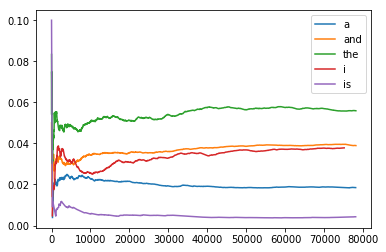

In [223]:
b =  remove_and_split(book)
c = count_words(b)
for key in c.keys():
    num = np.ones(len(c[key]))
    n =  np.cumsum(num)
    proportion = n/c[key]
    py.plot(c[key], proportion, label = key)
    
py.legend()

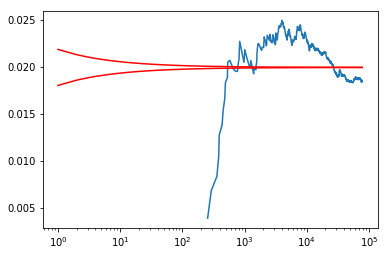

In [234]:
num = np.ones(len(c['a']))
n =  np.cumsum(num)
proportion = n/c['a']

py.plot(c['a'], proportion, label = key)
y = np.arange(1, len(b)+1).reshape(len(b), 1)
py.semilogx(y, (np.var(proportion)**0.5) * np.power(y,-0.5) + np.mean(proportion),'r')
py.semilogx(y,  -(np.var(proportion)**0.5) * np.power(y,-0.5) + np.mean(proportion),'r')


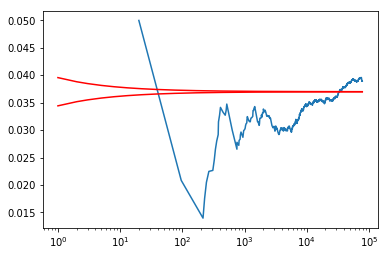

In [235]:
num = np.ones(len(c['and']))
n =  np.cumsum(num)
proportion = n/c['and']

py.plot(c['and'], proportion, label = key)
y = np.arange(1, len(b)+1).reshape(len(b), 1)
py.semilogx(y, (np.var(proportion)**0.5) * np.power(y,-0.5) + np.mean(proportion),'r')
py.semilogx(y,  -(np.var(proportion)**0.5) * np.power(y,-0.5) + np.mean(proportion),'r')

Can not apply the central limit theorem because : we need independent 'samples', in this case it is not.


How would we have to change the text for it to apply?
Shuffle will introduce independence. 

Why does it still work quite well?
Our sample size is huge

## 3. Denominator-layout notation

We used the numerator-layout notation for matrix calculus in class, now let's examine the denominator-layout notation.

Given $x, y\in\mathbb R$, $\mathbf x\in\mathbb R^n$ and $\mathbf y \in \mathbb R^m$, we have

$$
\frac{\partial y}{\partial \mathbf{x}}=\begin{bmatrix}
\frac{\partial y}{\partial x_1}\\
\frac{\partial y}{\partial x_2}\\
\vdots\\
\frac{\partial y}{\partial x_n}
\end{bmatrix},\quad 
\frac{\partial \mathbf y}{\partial {x}}=\begin{bmatrix}
\frac{\partial y_1}{\partial x}, 
\frac{\partial y_2}{\partial x}, 
\ldots,
\frac{\partial y_m}{\partial x}
\end{bmatrix}
$$

and 

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
=\begin{bmatrix}
\frac{\partial \mathbf y}{\partial {x_1}}\\
\frac{\partial \mathbf y}{\partial {x_2}}\\
\vdots\\
\frac{\partial \mathbf y}{\partial {x_3}}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1}, 
\frac{\partial y_2}{\partial x_1},
\ldots,
\frac{\partial y_m}{\partial x_1}
\\ 
\frac{\partial y_1}{\partial x_2},
\frac{\partial y_2}{\partial x_2},
\ldots,
\frac{\partial y_m}{\partial x_2}\\ 
\vdots\\
\frac{\partial y_1}{\partial x_n},
\frac{\partial y_2}{\partial x_n},
\ldots,
\frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

Questions: 

1. Assume $\mathbf  y = f(\mathbf u)$ and $\mathbf u = g(\mathbf x)$, write down the chain rule for $\frac {\partial\mathbf  y}{\partial\mathbf x}$
2. Given $\mathbf X \in \mathbb R^{m\times n},\ \mathbf w \in \mathbb R^n, \ \mathbf y \in \mathbb R^m$, assume $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, compute $\frac{\partial z}{\partial\mathbf w}$.

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
 ==
\frac{\partial \mathbf u}{\partial \mathbf{x}} * \frac{\partial \mathbf y}{\partial \mathbf{u}}
$$ 

because DU DX takes care of our inner 

$$
\frac{\partial \mathbf u}{\partial \mathbf{x}}
$$

so we multiply it out by:

$$
\frac{\partial \mathbf y}{\partial \mathbf{u}}
$$

and it cancels out to give us our dy/dx

## 4. Numerical Precision

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$.

In [115]:
def log_exp(x, y):
    ## add your solution here
    top = nd.exp(x)
    bottom =  nd.exp(x) + nd.exp(y)
    return -nd.log(top/bottom)

Test your codes with normal inputs:

In [116]:
x, y = nd.array([2]), nd.array([3])
z = log_exp(x, y)
z


[1.3132617]
<NDArray 1 @cpu(0)>

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [119]:
def grad(forward_func, x, y): 
    ## Add your codes here
    x.attach_grad()
    y.attach_grad()
    with autograd.record():
        z = forward_func(x,y)
    z.backward()
    print(x.grad)
    print(y.grad)

Test your codes, it should print the results nicely. 

In [118]:
grad(log_exp, x, y)


[-0.7310586]
<NDArray 1 @cpu(0)>

[0.7310586]
<NDArray 1 @cpu(0)>


But now let's try some "hard" inputs

In [121]:
x, y = nd.array([50]), nd.array([100])
grad(log_exp, x, y)


[nan]
<NDArray 1 @cpu(0)>

[nan]
<NDArray 1 @cpu(0)>


Does your code return correct results? If not, try to understand the reason. (Hint, evaluate `exp(100)`). Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.

For this method will be using identities : 

log(exp(a)+exp(b))=a+log(1+exp(b−a)) AND 
\n
log(exp(a)−exp(b))=a+log(1−exp(b−a))

In [203]:
def stable_log_exp(x, y):
    ## Add your codes here
    if  max(x,y) == x:
        second_part = y + nd.log(1 + nd.exp(x - y ))
    else :
        second_part = x + nd.log(1 + nd.exp(y -x))
    return -(nd.log(nd.exp(x)) - second_part)

grad(stable_log_exp, x, y)


[-1.]
<NDArray 1 @cpu(0)>

[1.]
<NDArray 1 @cpu(0)>
